In [1]:
# Standard import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Machine learning libraries
from tensorflow import keras
import tensorflow as tf

In [17]:
from Tools import Plot
from Tools import Custom_models
from Tools import Helpers

## Parameters of the 1D grid

In [18]:
# Number of interior points (excludind boundaries)
N = 98
# Space step
h = 2/(N+1)
# actual grid
x = np.array([-1+i*h for i in range(N+2)])
# Interior points grid
xint = x[1:-1]

## Definition of the basis functions

In [5]:
# Defining the basis function using both relu version and classical version

def relu_basis(x, i, h):
    assert(i>0 & i<len(x)-1)
    return 1/h*(tf.nn.relu(x-x[i-1]) - 2*tf.nn.relu(x-x[i]) + tf.nn.relu(x-x[i+1])).numpy()

def phi_basis(x, i, h=1):
    assert(i>0 & i<len(x)-1)
    output = np.zeros(len(x))
    output[i] = 1
    return output

## Plotting the basis functions

In [ ]:
plt.figure()
for i in range(1, len(x)-1):
    plt.plot(x, relu_basis(x,i,h), label=f'$\phi_{i}$')
plt.xlabel('$x$')
plt.ylabel('$\phi(x)$')
plt.legend()
plt.xlim([-1, 1.6])
plt.grid()
#plt.savefig('Figures_V2/1D/basis_functions.pdf', bbox_inches='tight')
plt.show()

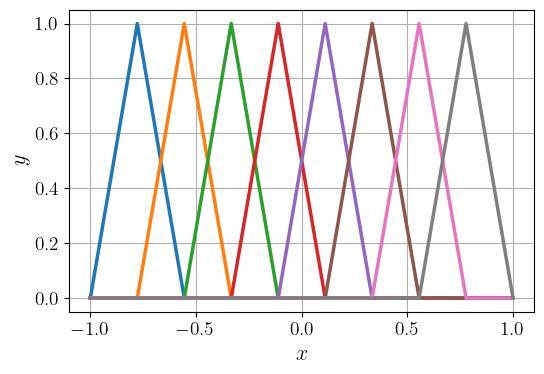

In [15]:
plt.figure()
for i in range(1, len(x)-1):
    plt.plot(x, phi_basis(x, i, h), label=f"$phi_{i}$")
plt.xlabel('$x$')
plt.ylabel('$y$')
#plt.legend()
plt.grid()

## Plot the interpolant

In [15]:
def u(x):
    k = 50   # steepness parameter
    x1 = -1/3  # location of transition parameter
    x2 = 1/3

    y = 1/2*(1 + np.tanh(k*(x-x1))) - 1/2*(1 + np.tanh(k*(x-x2)))
    
    return y


pi = 0

for i in range(1, len(x)-1):
    pi = pi + relu_basis(x,i,h)*u(x[i])


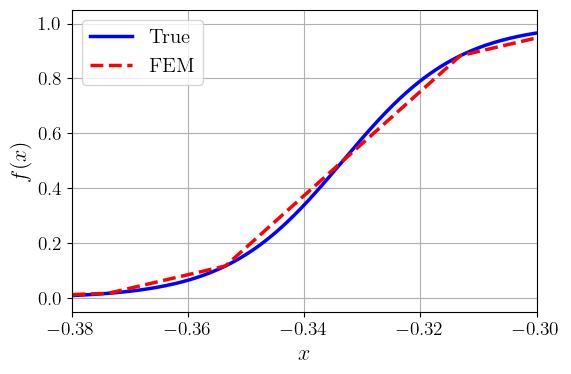

In [23]:
save = False
name = 'Figures/1D/FEM/Approx_exact_FEM_zoom.pdf'

x_big = np.linspace(-1, 1, 10000)

plt.figure()
plt.plot(x_big, u(x_big), 'b-', label='True')
plt.plot(x, pi, 'r--', label='FEM')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.xlim([-0.38, -0.3])
if (save):
    plt.savefig(name, bbox_inches='tight')
plt.show()

In [ ]:
Helpers.MES(